In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.lines as lines

In [6]:
df = pd.read_csv('weather-check.csv')

In [7]:
df.head()

,RespondentID,Do you typically check a daily weather report?,How do you typically check the weather?,A specific website or app (please provide the answer),"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887159451,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,-
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,3887145426,Yes,The default weather app on your phone,-,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic


# Assignment 1

In [8]:
df = df.rename(columns = {'If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?': 'Smartwatch'})
df[df["Smartwatch"] == '-'] = None
df[df['Age'] == '-'] = None
df = df.dropna()

In [9]:
pd.unique(df['Smartwatch'])

array(['Very likely', 'Somewhat likely', 'Very unlikely',
       'Somewhat unlikely'], dtype=object)

In [10]:
pd.unique(df['Age'])

array(['30 - 44', '18 - 29', '45 - 59', '60+'], dtype=object)

In [11]:
grouped_data = pd.crosstab(df['Age'], df['Smartwatch'])

In [12]:
data_dict = {}
for i in grouped_data.index:
    data_dict[i] = []
    for j in grouped_data.columns:
        data_dict[i].append(grouped_data.loc[i,j])

In [13]:
cum_sum = np.cumsum(list(data_dict.values()), axis = 1)

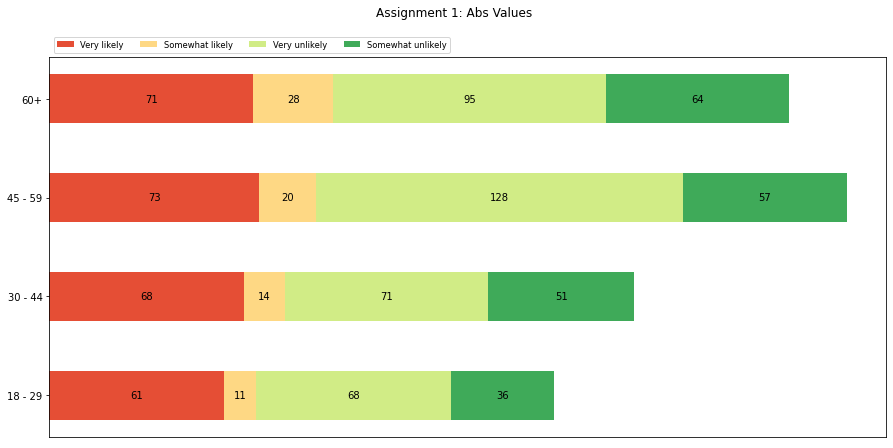

In [14]:
fig = plt.figure()
fig.set_size_inches(15,7)
fig.suptitle("Assignment 1: Abs Values")
ax = fig.add_subplot()
ax.xaxis.set_visible(False)
category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, len(data_dict)))
for i in range(len(data_dict)):
    widths = np.array(list(data_dict.values()))[:, i]
    ax.barh(list(data_dict.keys()),
            widths,
            color = category_colors[i],
            label = pd.unique(df['Smartwatch'])[i],
            left = cum_sum[:,i] - np.array(list(data_dict.values()))[:,i],
            height = 0.5)
    xcenters = cum_sum[:, i] - widths + widths/2
    for y, (x, c) in enumerate(zip(xcenters, widths)):
        ax.text(x, y, str(int(c)), ha='center', va='center')
ax.legend(ncol = len(data_dict), loc='lower left', fontsize='small',bbox_to_anchor=(0, 1));

In [15]:
data_dict_perc = {}
for i in grouped_data.index:
    data_dict_perc[i] = []
    for j in grouped_data.columns:
        data_dict_perc[i].append(round(grouped_data.loc[i,j]/sum(grouped_data.loc[i,:])*100,1))

In [16]:
cum_sum_perc = np.cumsum(list(data_dict_perc.values()), axis = 1)

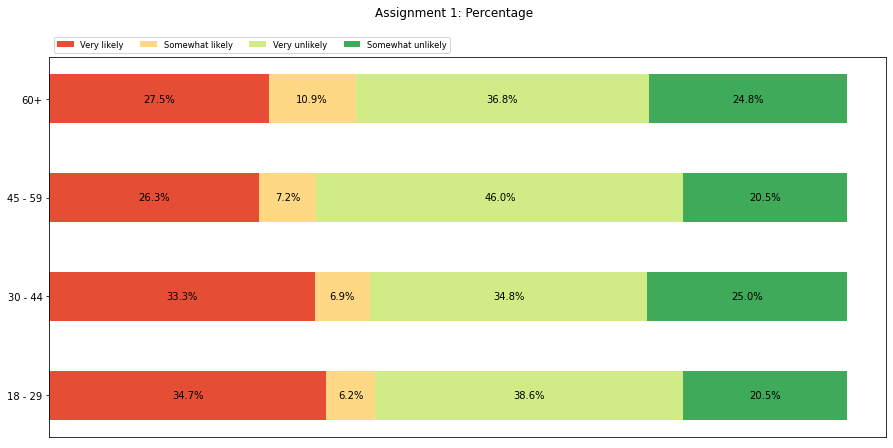

In [17]:
fig = plt.figure()
fig.set_size_inches(15,7)
fig.suptitle("Assignment 1: Percentage")
ax = fig.add_subplot()
ax.xaxis.set_visible(False)
category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, len(data_dict_perc)))
for i in range(len(data_dict_perc)):
    widths = np.array(list(data_dict_perc.values()))[:, i]
    ax.barh(list(data_dict_perc.keys()),
            widths,
            color = category_colors[i],
            label = pd.unique(df['Smartwatch'])[i],
            left = cum_sum_perc[:,i] - np.array(list(data_dict_perc.values()))[:,i],
            height = 0.5)
    xcenters = cum_sum_perc[:, i] - widths + widths/2
    for y, (x, c) in enumerate(zip(xcenters, widths)):
        ax.text(x, y, str(float(c)) + "%", ha='center', va='center')
ax.legend(ncol = len(data_dict_perc), loc='lower left', fontsize='small',bbox_to_anchor=(0, 1));

# Assignment 2

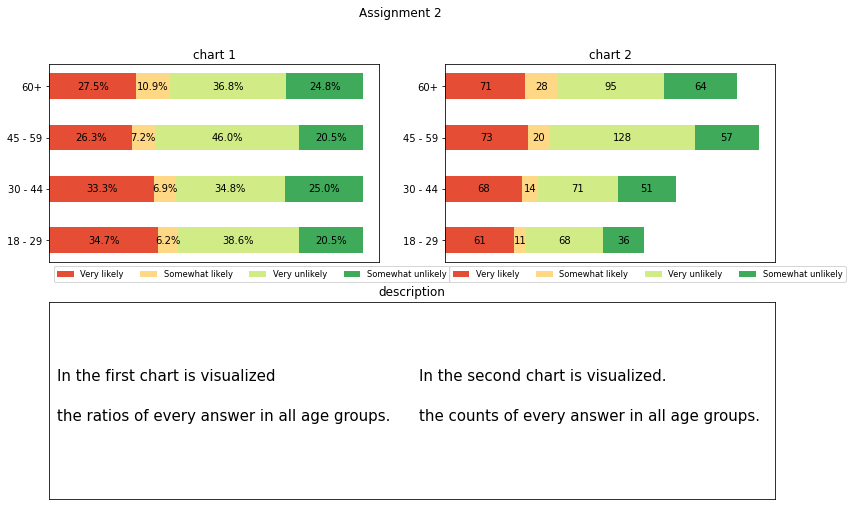

In [18]:
fig = plt.figure()
fig.suptitle('Assignment 2')
fig.set_size_inches(13,8)
gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0,0])
ax1.set_title('chart 1')
ax2 = fig.add_subplot(gs[0,1])
ax2.set_title('chart 2')
ax3 = fig.add_subplot(gs[1,:])
ax3.set_title('description')

# Adding chart 1.
ax1.xaxis.set_visible(False)
category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, len(data_dict_perc)))
for i in range(len(data_dict_perc)):
    widths = np.array(list(data_dict_perc.values()))[:, i]
    ax1.barh(list(data_dict_perc.keys()),
            widths,
            color = category_colors[i],
            label = pd.unique(df['Smartwatch'])[i],
            left = cum_sum_perc[:,i] - np.array(list(data_dict_perc.values()))[:,i],
            height = 0.5)
    xcenters = cum_sum_perc[:, i] - widths + widths/2
    for y, (x, c) in enumerate(zip(xcenters, widths)):
        ax1.text(x, y, str(float(c)) + "%", ha='center', va='center')
ax1.legend(ncol = len(data_dict_perc), loc='upper left', fontsize='small',bbox_to_anchor=(0, 0));

# Adding chart 2.
ax2.xaxis.set_visible(False)
category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, len(data_dict)))
for i in range(len(data_dict)):
    widths = np.array(list(data_dict.values()))[:, i]
    ax2.barh(list(data_dict.keys()),
            widths,
            color = category_colors[i],
            label = pd.unique(df['Smartwatch'])[i],
            left = cum_sum[:,i] - np.array(list(data_dict.values()))[:,i],
            height = 0.5)
    xcenters = cum_sum[:, i] - widths + widths/2
    for y, (x, c) in enumerate(zip(xcenters, widths)):
        ax2.text(x, y, str(int(c)), ha='center', va='center')
ax2.legend(ncol = len(data_dict), loc='upper left', fontsize='small',bbox_to_anchor=(0, 0));


# Adding description.
ax3.xaxis.set_visible(False)
ax3.yaxis.set_visible(False)
ax3.text(0.01,0.6,'In the first chart is visualized', fontsize = 15);
ax3.text(0.01,0.4,'the ratios of every answer in all age groups.', fontsize = 15);
ax3.text(0.51,0.6,'In the second chart is visualized.', fontsize = 15);
ax3.text(0.51,0.4,'the counts of every answer in all age groups.', fontsize = 15);